In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'sans-serif', 
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'legend.frameon': False,
    'legend.fontsize': 20,
})

In [9]:
# Load data from all cutoff directories
cutoffs = ['local_cube_chgnet', 'full_structure_chgnet']
data = {}

for cutoff in cutoffs:
    events = np.load(f'{cutoff}/events.npy')
    barriers = np.load(f'{cutoff}/barriers.npy')
    data[cutoff] = {'events': events, 'barriers': barriers}
    print(f"{cutoff}: {len(events)} events, barriers shape: {barriers.shape}")


local_cube_chgnet: 200 events, barriers shape: (200,)
full_structure_chgnet: 200 events, barriers shape: (200,)


In [11]:
# Verify that all events.npy are the same
reference_events = data['local_cube_chgnet']['events']
all_same = True

for cutoff in cutoffs[1:]:
    if not np.array_equal(reference_events, data[cutoff]['events']):
        print(f"WARNING: {cutoff} events differ from local_cube!")
        all_same = False
    else:
        print(f"{cutoff} events match local_cube ✓")

if all_same:
    print("\n✓ All events.npy files are identical!")
else:
    print("\n✗ Events are NOT identical across cutoffs!")


full_structure_chgnet events match local_cube ✓

✓ All events.npy files are identical!


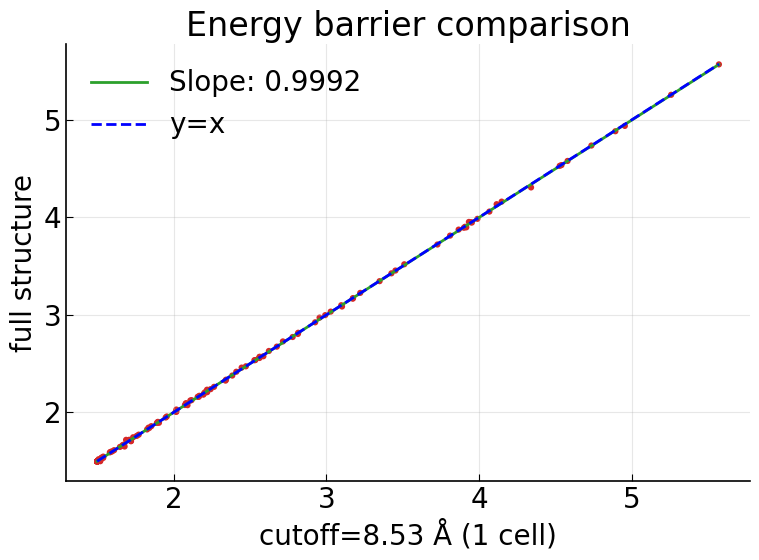

In [12]:
# Compare barriers across different cutoffs with linear fits (vs cutoff 30.0)
from scipy.stats import linregress

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

cube_1 = data['local_cube_chgnet']['barriers']
barriers_full = data['full_structure_chgnet']['barriers']

# Plot 1: Barrier comparison scatter (1 cell vs 3 cells)
ax = axes
ax.scatter(cube_1, barriers_full, alpha=1, s=20, color='tab:red', edgecolors='none')
slope, intercept, r_value, p_value, std_err = linregress(cube_1, barriers_full)
x_fit = np.array([cube_1.min(), cube_1.max()])
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, '-', color='tab:green', linewidth=2, label=f'Slope: {slope:.4f}')
ax.plot([cube_1.min(), cube_1.max()], [cube_1.min(), cube_1.max()], 'b--', linewidth=2, label='y=x')
ax.set_xlabel('cutoff=8.53 Å (1 cell)')
ax.set_ylabel('full structure')
ax.set_title('Energy barrier comparison')

ax.legend()
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('cube_vs_3_cells.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [13]:
cube_1

array([2.2163086, 1.5      , 1.5      , 1.8545532, 1.7216797, 2.5634766,
       1.9557495, 1.5      , 1.5      , 1.5      , 2.562439 , 1.664856 ,
       3.9520264, 2.0913086, 1.5      , 2.9555664, 1.5      , 2.9925537,
       1.5      , 1.5      , 1.8967896, 1.5      , 1.5      , 1.5      ,
       1.6687012, 3.0974731, 3.8997803, 1.5      , 2.157837 , 2.8154907,
       2.7792358, 5.2557983, 1.5      , 3.4255981, 2.2053223, 1.5      ,
       2.0185547, 1.5      , 1.8911133, 1.7209473, 1.5      , 1.5      ,
       2.5352783, 1.5      , 3.8653564, 3.9454956, 1.5      , 4.8910522,
       1.5205078, 3.9154053, 1.5098267, 1.5      , 1.5      , 1.5202026,
       1.5      , 1.5      , 3.5097656, 2.2426758, 1.5      , 2.715454 ,
       1.5      , 1.5      , 1.5      , 2.9265747, 2.0184937, 2.2649536,
       3.3481445, 1.5      , 4.952881 , 1.5      , 2.4105225, 1.5      ,
       1.6491699, 1.5      , 2.4455566, 1.5      , 1.5      , 1.5      ,
       1.6766357, 1.8409424, 1.5      , 1.5      , 

In [14]:
barriers_full

array([2.2148438, 1.5      , 1.5      , 1.859375 , 1.7055664, 2.5708008,
       1.9584961, 1.5      , 1.5      , 1.5      , 2.5581055, 1.659668 ,
       3.9458008, 2.0742188, 1.5      , 2.9716797, 1.5      , 2.9970703,
       1.5      , 1.5      , 1.8994141, 1.5      , 1.5      , 1.5      ,
       1.6665039, 3.0986328, 3.8925781, 1.5      , 2.1601562, 2.8164062,
       2.7729492, 5.254883 , 1.5      , 3.425293 , 2.206543 , 1.5      ,
       2.006836 , 1.5      , 1.8930664, 1.7070312, 1.5      , 1.5      ,
       2.536621 , 1.5      , 3.8735352, 3.9487305, 1.5      , 4.8813477,
       1.5      , 3.8964844, 1.5205078, 1.5      , 1.5      , 1.5146484,
       1.5      , 1.5      , 3.5180664, 2.2387695, 1.5      , 2.727539 ,
       1.5      , 1.5      , 1.5      , 2.9233398, 2.0297852, 2.262207 ,
       3.3452148, 1.5      , 4.936035 , 1.5      , 2.4169922, 1.5      ,
       1.6464844, 1.5      , 2.4594727, 1.5      , 1.5      , 1.5      ,
       1.6708984, 1.8408203, 1.5      , 1.5      , 